# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [42]:
#Import all the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [43]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
pima_df = pd.read_csv("pima-indians-diabetes-1.data",names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [44]:
pima_df.sample(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
91,4,123,80,15,176,32.0,0.443,34,0
50,1,103,80,11,82,19.4,0.491,22,0
205,5,111,72,28,0,23.9,0.407,27,0
152,9,156,86,28,155,34.3,1.189,42,1
223,7,142,60,33,190,28.8,0.687,61,0
760,2,88,58,26,16,28.4,0.766,22,0
411,1,112,72,30,176,34.4,0.528,25,0
375,12,140,82,43,325,39.2,0.528,58,1
126,3,120,70,30,135,42.9,0.452,30,0
696,3,169,74,19,125,29.9,0.268,31,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [45]:
pima_df.dtypes

preg         int64
glu          int64
bp           int64
sft          int64
ins          int64
bmi        float64
dpf        float64
age          int64
outcome      int64
dtype: object

In [46]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [47]:
(pima_df == 0).sum()

preg       111
glu          5
bp          35
sft        227
ins        374
bmi         11
dpf          0
age          0
outcome    500
dtype: int64

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [48]:
# replacing all the 0 values with NaN so that the false 0s do not affect the calculation of the Median

pima_df['glu']=pima_df['glu'].replace(0,np.nan)
pima_df['bp']=pima_df['bp'].replace(0,np.nan)
pima_df['sft']=pima_df['sft'].replace(0,np.nan)
pima_df['ins']=pima_df['ins'].replace(0,np.nan)
pima_df['bmi']=pima_df['bmi'].replace(0,np.nan)

In [49]:
(pima_df == 0).sum()

preg       111
glu          0
bp           0
sft          0
ins          0
bmi          0
dpf          0
age          0
outcome    500
dtype: int64

In [50]:
pima_df.median()

preg         3.0000
glu        117.0000
bp          72.0000
sft         29.0000
ins        125.0000
bmi         32.3000
dpf          0.3725
age         29.0000
outcome      0.0000
dtype: float64

In [51]:
pima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [52]:
median = pima_df.median()
pima_df.fillna(median, inplace = True)

In [53]:
pima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [54]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glu,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
bp,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
sft,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
ins,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
bmi,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

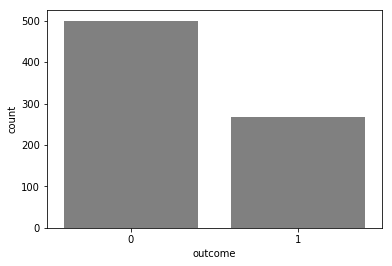

In [55]:
sns.countplot(pima_df['outcome'], color='gray')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


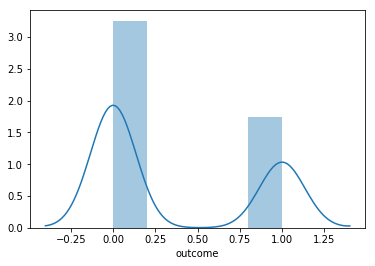

In [56]:
sns.distplot(pima_df['outcome'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


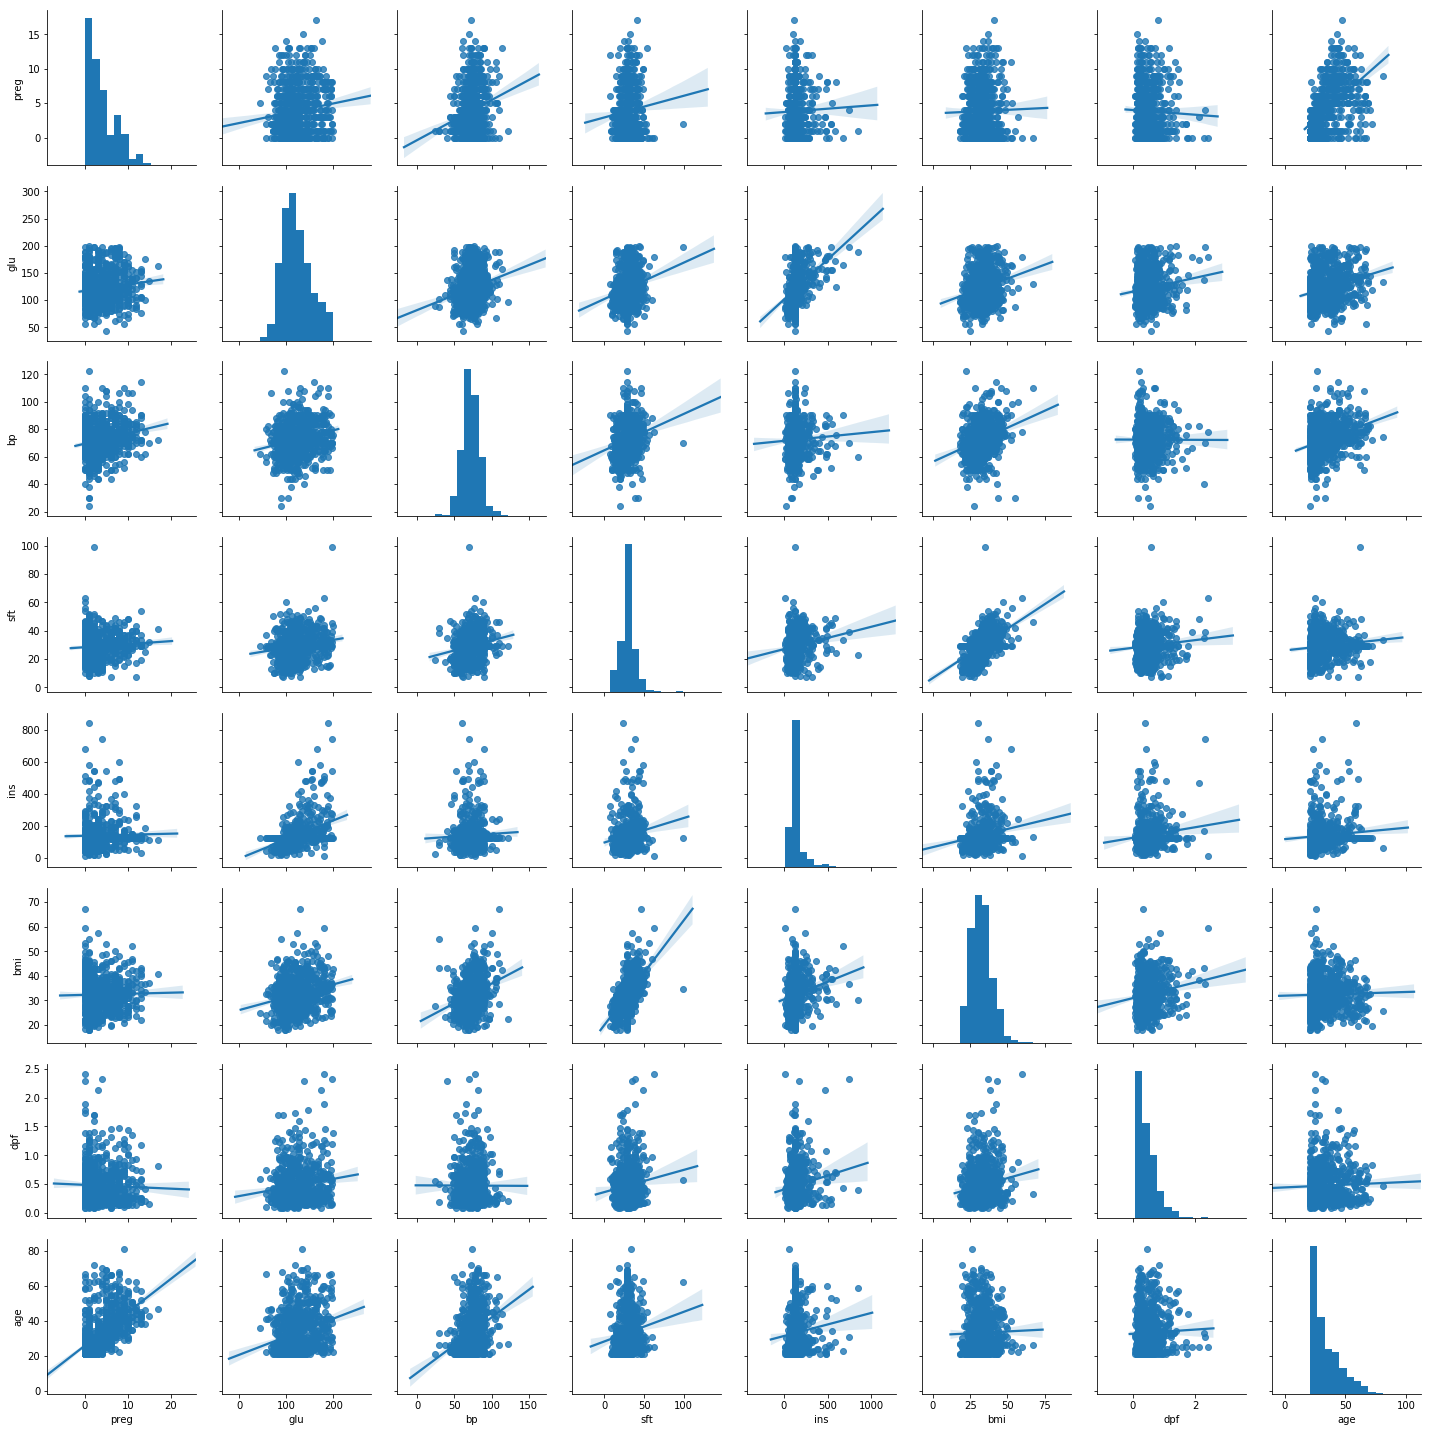

In [91]:
sns.pairplot(pima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']], kind="reg")

# Insights:

# 1) Pregnancy has a +ve and fairly high correlation with Age

# 2) Pregnancy histogram is heavily right skewed

# 3) Glucose has a +ve correlation with Age, BMI, Insulin and Pregnancy

# 4) Glucose histogram is fairly normal in distribution

# 5) Blood Pressure has +ve and fairly high correlation with Age, BMI, Glucose and Pregnancy

# 6) Blood PRessure histogram is fairly normal in distribution

# 7) Skin Thickness has +ve and very high correlation with BMI and fairly high correlation with Age, 
#    Blood Pressure, Glucose and Pregnancy

# 8) Skin Thickness histogram is fairly normal in distribution

# 9) Insulin has +ve and very high correlation with Glucose and +ve correlation with other remaining attributes

# 10)Insulin histogram is fairly right skewed

# 11)BMI has +ve and very high correlation with Skin Thickness and Blood Pressure, whereas it has +ve correlation with
#    other attributes

# 12)BMI has histogram is fairly normal in distribution

# 13)Age has a +ve and very high correlation with Blood Pressure and Pregnancy, whereas it has +ve correlation with
#    other attributes

# 14)Age histogram is highly right skewed 

In [37]:
pima_df.corr()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
glu,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
bp,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
sft,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
ins,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
bmi,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
dpf,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [57]:
pima_df['outcome'] = pima_df['outcome'].replace({0: 'Healthy', 1: 'Diabetic'})

In [58]:
pima_df['outcome'] = pima_df.outcome.astype('category')

In [62]:
X=pima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=pima_df['outcome']

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [64]:
Xtrain=np.array(xtrain)
Ytrain=np.array(ytrain)

In [65]:
Xtest=np.array(xtest)
Ytest=np.array(ytest)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [66]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [67]:
ypred=model.predict(Xtest)

In [68]:
acc=metrics.accuracy_score(Ytest,ypred)
print(acc)

0.7402597402597403


In [69]:
cm=metrics.confusion_matrix(Ytest,ypred)
print(cm)

[[ 47  27]
 [ 33 124]]


Print the feature importance of the decision model - Optional

In [70]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = xtrain.columns))

           Imp
preg  0.071208
glu   0.309847
bp    0.059266
sft   0.063223
ins   0.067576
bmi   0.187540
dpf   0.105686
age   0.135653


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [71]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,random_state=0 ) 
Rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
ypred=Rf_model.predict(Xtest)

In [73]:
acc=metrics.accuracy_score(Ytest,ypred)
print(acc)

0.7705627705627706


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [75]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(base_estimator=model,n_estimators= 51)
#abcl.fit(values[:,:-1],values[:,-1])
abcl.fit(Xtrain,Ytrain)
#abcl.score(test_set , test_labels)# use this if you have reserved any dataset for testing

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [78]:
y_pred_boost = abcl.predict(Xtest)
metrics.accuracy_score(Ytest,y_pred_boost)

0.7575757575757576

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [79]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=model,n_estimators=51,oob_score=True)
bgcl.fit(Xtrain,Ytrain)
#bgcl.oob_score_     ### testing the ensemble against OOB
#bgcl.score(test_set , test_labels) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [80]:
bgcl.oob_score_

0.7541899441340782

In [82]:
#In production any unseen new snapshot of data can be used for testing 
production_pred = bgcl.predict(Xtest)
metrics.accuracy_score(Ytest,production_pred)

0.7965367965367965

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(Xtrain,Ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [85]:
y_predict=gbcl.predict(Xtest)

In [86]:
metrics.accuracy_score(Ytest,y_predict)

0.7748917748917749

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [88]:
dtcl = DecisionTreeClassifier(criterion = 'entropy')
rfcl = RandomForestClassifier(random_state=1)
abcl = AdaBoostClassifier(base_estimator=model,n_estimators= 51)
bgcl = BaggingClassifier(base_estimator=model,n_estimators=51,oob_score=True)
gbcl = GradientBoostingClassifier(n_estimators = 51)

enclf = VotingClassifier(estimators = [('dt', dtcl), ('rf', rfcl), ('ab', abcl), ('bg', bgcl), ('gb, gbcl')], voting = 'hard')

In [90]:
for clf, label in zip([dtcl , rfcl, abcl, bgcl, gbcl], ['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging', 'Gradient']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.68 (+/- 0.03) [DecisionTree]
Accuracy: 0.74 (+/- 0.03) [RandomForest]
Accuracy: 0.67 (+/- 0.03) [AdaBoost]
Accuracy: 0.77 (+/- 0.04) [Bagging]
Accuracy: 0.77 (+/- 0.02) [Gradient]


In [ ]:
# Insight:

# From the above Accuracy values we can see that the Accuracy value increases from Decision Tree to Random Forest model.
# By applying AdaBoost model the Accuracy actually decreases but it increases after application of Bagging and
# Gradient Boost models with a value of .77 in each case